## Regression





###1. Linear Regression

In [0]:
# Supplementary functions
import numpy as np


# generate points to plot
def generate_points_linear():
  x = np.linspace(1, 100, num=100)
  np.random.shuffle(x)
  pick = x[:50]
  X, X_test = pick[:30, np.newaxis], pick[20:, np.newaxis]
  return X, X_test

# linead function 
def lin_fun(x):
  # add noise 
  noise = np.random.normal(0,15,x.shape[0])
  noise = noise[:, np.newaxis]
 
  y = -3 * x + 2 + noise
  return y

We train a line regression model to fit this data using scikit-learn.

Coefficient = [-3.09773911] Intercept = [5.7385009]


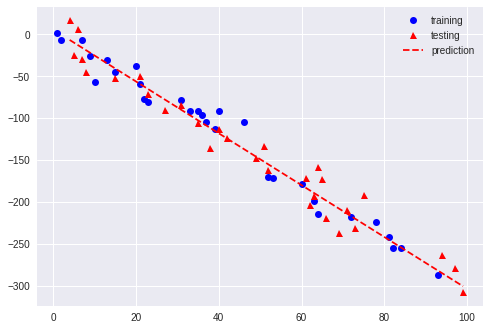

In [0]:
# dataset
X, X_test = generate_points_linear()
y, y_test = lin_fun(X), lin_fun(X_test)

#visualizing data
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo', label='training')
plt.plot(X_test, y_test, 'r^', label='testing')

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression().fit(X, y)
X_test.sort(axis=0)
y_pred = linear_regressor.predict(X_test) 
plt.plot(X_test, y_pred, 'r--', label='prediction')
plt.legend()

# print coefficients
print('Coefficient =', linear_regressor.coef_[0], 'Intercept =', linear_regressor.intercept_ )

###2. Polynomial Regression

In [0]:
# generate points to plot
def generate_points_poly():
  x = np.linspace(1, 10, num=1000)
  np.random.shuffle(x)
  pick = x[:30]
  X, X_test = pick[:20, np.newaxis], pick[10:, np.newaxis]
  return X, X_test


def poly_fun(x):
  # add noise 
  noise = np.random.normal(0,15,x.shape[0])
  noise = noise[:, np.newaxis]
 
  y = x * np.sin(x) 
  return y

We use a linear regression model with polynomial features.

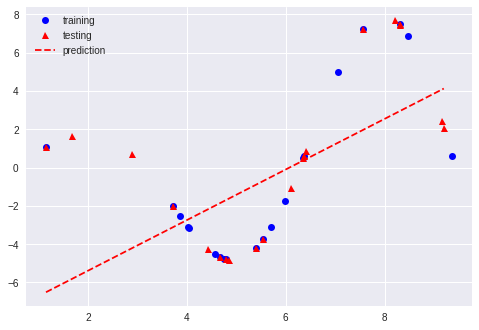

In [0]:
# dataset
X, X_test = generate_points_poly()
y, y_test = poly_fun(X), poly_fun(X_test)

#visualizing data
import matplotlib.pyplot as plt
plt.plot(X, y, 'bo', label = 'training')
plt.plot(X_test, y_test, 'r^', label = 'testing')


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# pipeline will first transform X to polynomial form and then apply linear regression
# experiment with degree value for a better fit
degree = 1

pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_regressor = pipeline.fit(X, y)

X_test.sort(axis=0)
y_pred = poly_regressor.predict(X_test)
plt.plot(X_test, y_pred, 'r--', label = 'prediction')
plt.legend()

### 3. Problem 1 
For this problem we you be working on the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), where you will predict the disease progression based on given features.

In [0]:
# helper code
import numpy as np
from sklearn import datasets

def read_data():
  diabetes = datasets.load_diabetes()  
  features = diabetes['data']
  output = diabetes['target']
  
  X, y = features[:-50, :], output[:-50]
  X_test, y_test = features[-50:, :], output[-50:]
  
  return X, y, X_test, y_test
  

In [0]:
# read data
X, y, X_test, y_test = read_data()


# TODO: Implement regression model
def predict(X, y, X_test):
  # ...
  # ...
  # ...
  return None


y_pred = predict(X, y, X_test)


# evaluate performance
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error = ', error)

pick = np.random.randint(0,y_test.shape[0], size=10)
print('\nTrue value\tPredicted value')
for i in pick:
  print(y_test[i],'\t\t', y_pred[i])
  
  

Mean Squared Error =  37319.4375

True value	Predicted value
64.0 		 123.75
233.0 		 -1.5
104.0 		 135.625
178.0 		 220.5
111.0 		 176.25
183.0 		 165.125
72.0 		 106.125
220.0 		 128.25
173.0 		 -106.0
104.0 		 135.625


# Classification

![Precision Recall](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)
![alt text](https://msdnshared.blob.core.windows.net/media/MSDNBlogsFS/prod.evol.blogs.msdn.com/CommunityServer.Blogs.Components.WeblogFiles/00/00/01/57/11/metablogapi/0116.image_thumb_3213B628.png)

### 1. Logistic Regression

In [0]:
# helper code
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

def generate_points():
  X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=6)  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  return X_train, y_train, X_test, y_test

def visualize(X_train, y_train, X_test, y_test, classifier):
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  cm = plt.cm.RdBu
  h = .02
 
  X = np.concatenate((X_train, X_test))
  y = np.concatenate((y_train, y_test))
  
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
   
  # Plot the training points
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

  # Plot the testing points
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
  

  
  

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        33



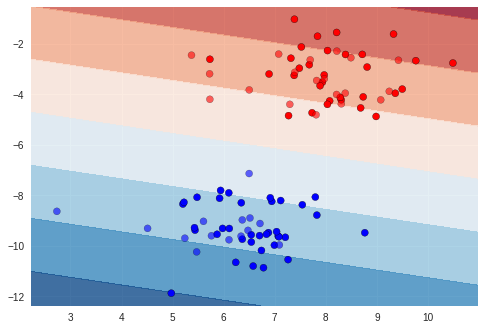

In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X, y, X_test, y_test = generate_points()

# classify
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# visualize
visualize(X, y, X_test, y_test, clf)




### 2. SVM

In [0]:
# helper code
from sklearn.datasets.samples_generator import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_points():
  X, y = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=6)  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  return X_train, y_train, X_test, y_test

def visualize(X_train, y_train, X_test, y_test, classifier):
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  cm = plt.cm.RdBu
  h = .02
 
  X = np.concatenate((X_train, X_test))
  y = np.concatenate((y_train, y_test))
  
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  if hasattr(classifier, "decision_function"):
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
   
  # Plot the training points
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

  # Plot the testing points
  y_pred = classifier.predict(X_test)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.48      1.00      0.65        16
          1       0.00      0.00      0.00        17

avg / total       0.24      0.48      0.32        33



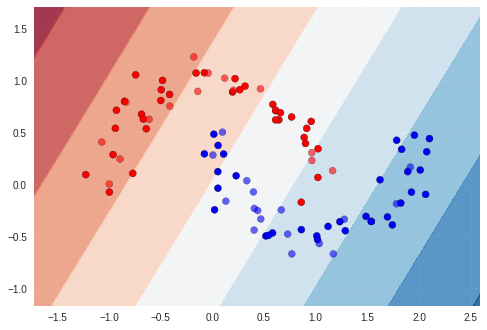

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X, y, X_test, y_test = generate_points()

# classify


# Kernel can be ‘linear’, ‘rbf’ or ‘sigmoid’
# Vary gamma from 0.001 to 5

kernel = 'Linear'
clf = SVC(gamma=0.001).fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# visualize
visualize(X, y, X_test, y_test, clf)

### 3. Problem 2 
For this problem we will use the [Iris Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), which contains the features of Iris flowers of three related species.

In [0]:
# helper code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


def read_data():
  diabetes = datasets.load_iris()  
  features = diabetes['data']
  output = diabetes['target']
  
  splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
  splitter.get_n_splits(features, output)
  
  train_index, test_index = next(splitter.split(features, output))
  
  X, y = features[train_index, :], output[train_index]
  X_test, y_test = features[test_index, :], output[test_index]
  
  return X, y, X_test, y_test


def visualize(X_train, y_train, X_test, y_test, classifier):
  X = np.concatenate((X_train, X_test))
  y = np.concatenate((y_train, y_test))
  
  X_embedded = TSNE(n_components=2).fit_transform(X)
  X_train_embedded, X_test_embedded = X_embedded[:X_train.shape[0]], X_embedded[X_train.shape[0]:]
  
  cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
  cm = plt.cm.RdBu
  h = .02
  
  
  # Plot the training points
  plt.scatter(X_train_embedded[:, 0], X_train_embedded[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

  # Plot the testing points
  y_pred = classifier.predict(X_test)
  plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        45



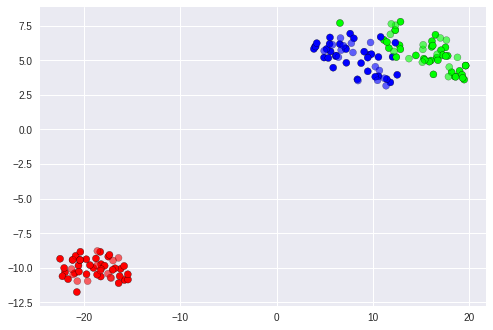

In [0]:
# TODO - Implement the classifier by yourself
# Step -1 Import libraries (refer libraries imported in above example)



# Step -2 Read data (call the function in helper code section)



# Step -3 Classify (use a classifier of your choise and vary the parameters of the classifier)




# Step -4 Print accuracy and optionally visualize (using helper code)


# Additional Problems

Only solve after all basic problems are done

### 1. Regression
For this problem you will be required the predict the [energy requirement](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)  of a building  based on the observations of a milti-sensor device. Use the helper code to read data.

In [0]:
# helper code

import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def get_time_features(x):
	return [x.hour, x.minute]

def str_to_float(x):
  x = x.decode("utf-8")
  x = x.replace('\"', '')
  return float(x)

def read_data():
  cols = range(27)
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
  
  
  converter_map = {0: lambda x: datetime.strptime(x.decode("utf-8"), "\"%Y-%m-%d %H:%M:%S\"")}
  for i in range(1, 27):
    converter_map[i] = lambda x: str_to_float(x)
  
  data = np.loadtxt(url, delimiter=",", skiprows=1,  usecols=cols, dtype=object, 
                     converters=converter_map)
  
  mapped = np.array(list(map(get_time_features, data[:,0])))
  X = np.concatenate((mapped, data[:,2:27]), axis=1)
  y = data[:,1]
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  return X_train, y_train, X_test, y_test

def evaulate(y_test, y_pred):
  error = mean_squared_error(y_test, y_pred)
  print('Mean Squared Error = ', error)

  pick = np.random.randint(0,y_test.shape[0], size=10)
  print('\nTrue value\tPredicted value')
  for i in pick:
    print(y_test[i],'\t\t', y_pred[i])
  

In [0]:
# TODO - Implement the regression problem
# use read_data() and evaluate() functions from the helper code


### 2. Classification
For this problem you will be working on the [NIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, where you have to train a ML classifier to recognize hand written gicits \[0-9\]. Use the functions in the helper code.


In [0]:
# helper code
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report


def read_data():
  digits = datasets.load_digits()  
  features = digits['data']
  output = digits['target']
  images = digits['images']

  splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
  splitter.get_n_splits(features, output)
  
  train_index, test_index = next(splitter.split(features, output))
  
  X, y = features[train_index, :], output[train_index]
  X_test, y_test = features[test_index, :], output[test_index]
  
  return X, y, X_test, y_test


def evaluate(X_test, y_test, y_pred):
  print(classification_report(y_test, y_pred))
  
  pick = np.random.randint(0,y_test.shape[0], size=25)
  for index in range(len(pick)):
    prediction = y_pred[pick[index]] 
    image = np.reshape(X_test[pick[index]], (8, 8))
    
    pos = 5 * (2 * (index // 5) + 1) + (index % 5) + 1
      
    plt.subplot(10, 5, pos)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
  
  plt.show()
  
  


In [0]:
# TODO - Implement the classification problem
# use read_data() and evaluate() functions from the helper code